# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
shape = data.shape
print(f"The dataset contains {shape[0]} rows and {shape[1]} columns")

The dataset contains 5391 rows and 6 columns


In [5]:
data.isnull().values.any()
if data.isnull().values.any() == False:
    print("There are no NaN values present in the dataset")
else:
    print("The dataset contains NaN")

There are no NaN values present in the dataset


In [6]:
if data.duplicated().any() == False:
    print("There are no duplicate rows in the dataset")
else:
    print("The dataset contains duplicate rows")

There are no duplicate rows in the dataset


In [7]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [8]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [10]:
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace('$','')
data['USD_Production_Budget'] = data['USD_Production_Budget'].str.replace(',','')

data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace('$','')
data['USD_Worldwide_Gross'] = data['USD_Worldwide_Gross'].str.replace(',','')

data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace('$','')
data['USD_Domestic_Gross'] = data['USD_Domestic_Gross'].str.replace(',','')


data['USD_Production_Budget'] = pd.to_numeric(data['USD_Production_Budget'])
data['USD_Worldwide_Gross'] = pd.to_numeric(data['USD_Worldwide_Gross'])
data['USD_Domestic_Gross'] = pd.to_numeric(data['USD_Domestic_Gross'])

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [11]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [12]:
data.sample(7)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
385,2596,1984-06-29,Conan the Destroyer,18000000,26400000,26400000
4625,4938,2014-07-01,Hidden Away,1000000,0,0
4207,343,2012-08-17,The Expendables 2,100000000,311979256,85028192
1290,1410,1999-08-20,Universal Soldier II: The Return,40000000,10717421,10447421
2009,3674,2003-04-07,Swimming Pool,7800000,24021282,10130108
3759,2646,2010-10-15,Carlos,18000000,157002,145526
2131,2575,2003-11-26,Bad Santa,18000000,77147031,60060328


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [14]:
# print(f"The average production budget of the films in the dataset is: {round(data['USD_Production_Budget'].mean(), 2)}")
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [15]:
print("The average film costs about $31m. The average worldwide gross is about 89m")
print("The minimums for worldwide and domestic revenue are both $0")
print("TODO: Are the bottom 25% of films actually profitable or do they lose money?")
print("The highest production budget is $425,000,000 and the highest worldwide gross revenue is $2,783,918,982")

The average film costs about $31m. The average worldwide gross is about 89m
The minimums for worldwide and domestic revenue are both $0
TODO: Are the bottom 25% of films actually profitable or do they lose money?
The highest production budget is $425,000,000 and the highest worldwide gross revenue is $2,783,918,982


In [16]:
#6. How much revenue did the lowest budget films make?
data[data.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


Sorprendente! It grossed 181,041 with a measly 1,100 budget. 😮 Wow

In [17]:
#6. How much revenue did the highest budget films make?
data[data.USD_Production_Budget == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


Ce lo aspettavamo

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [18]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0].sort_values(by=['USD_Production_Budget'], ascending=False)
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')

Number of films that grossed $0 worldwide 357


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [19]:
zero_worldwide.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [20]:
international_releases = data.query("USD_Worldwide_Gross!=0 and USD_Domestic_Gross==0")
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films.

In [21]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')
future_releases = data[data.Release_Date >= scrape_date]
print(future_releases.shape)
future_releases

(7, 6)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [22]:
data_clean = data.drop(future_releases.index)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [23]:
tot_rows = list(data_clean.shape)[0]
num = data_clean[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross].count().iloc[0]
percent = round(num/tot_rows*100, 2)

print(f"The percentage of films where the production costs exceeded the worldwide gross revenue is: {percent}%")

The percentage of films where the production costs exceeded the worldwide gross revenue is: 37.28%


In both cases, we see that a whopping 37.2% 😮 of films do not recoup their production budget at the box office.
💸💸💸 Who knew that film finance could be so risky! 😬

# Seaborn for Data Viz: Bubble Charts

[(0.0, 3000000000.0),
 (0.0, 450000000.0),
 Text(0, 0.5, 'Revenue in $ in bilions'),
 Text(0.5, 0, 'Budget in $100 milions')]

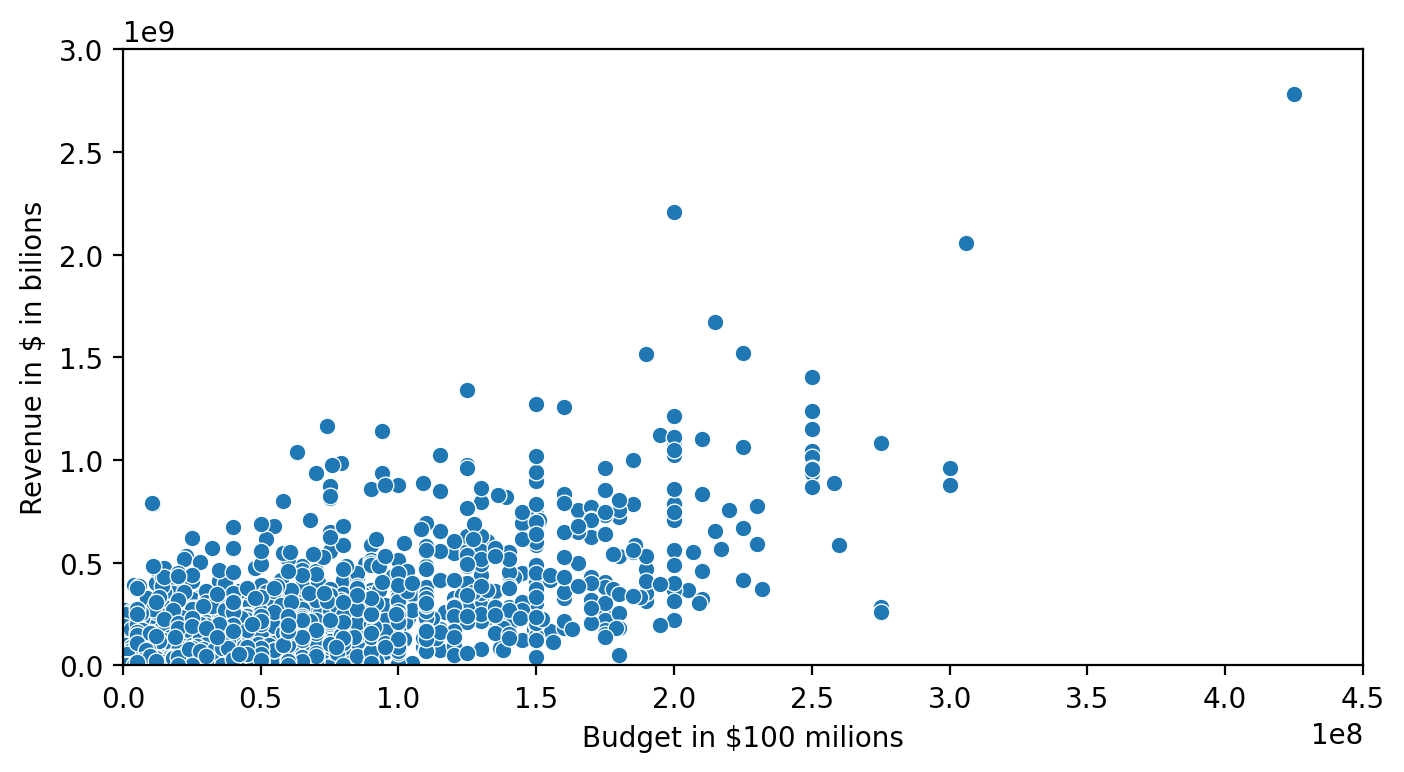

In [24]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
               x='USD_Production_Budget',
               y='USD_Worldwide_Gross')

ax.set(
    ylim=(0, 3000000000),
    xlim=(0, 450000000),
    ylabel='Revenue in $ in bilions',
    xlabel='Budget in $100 milions'
)

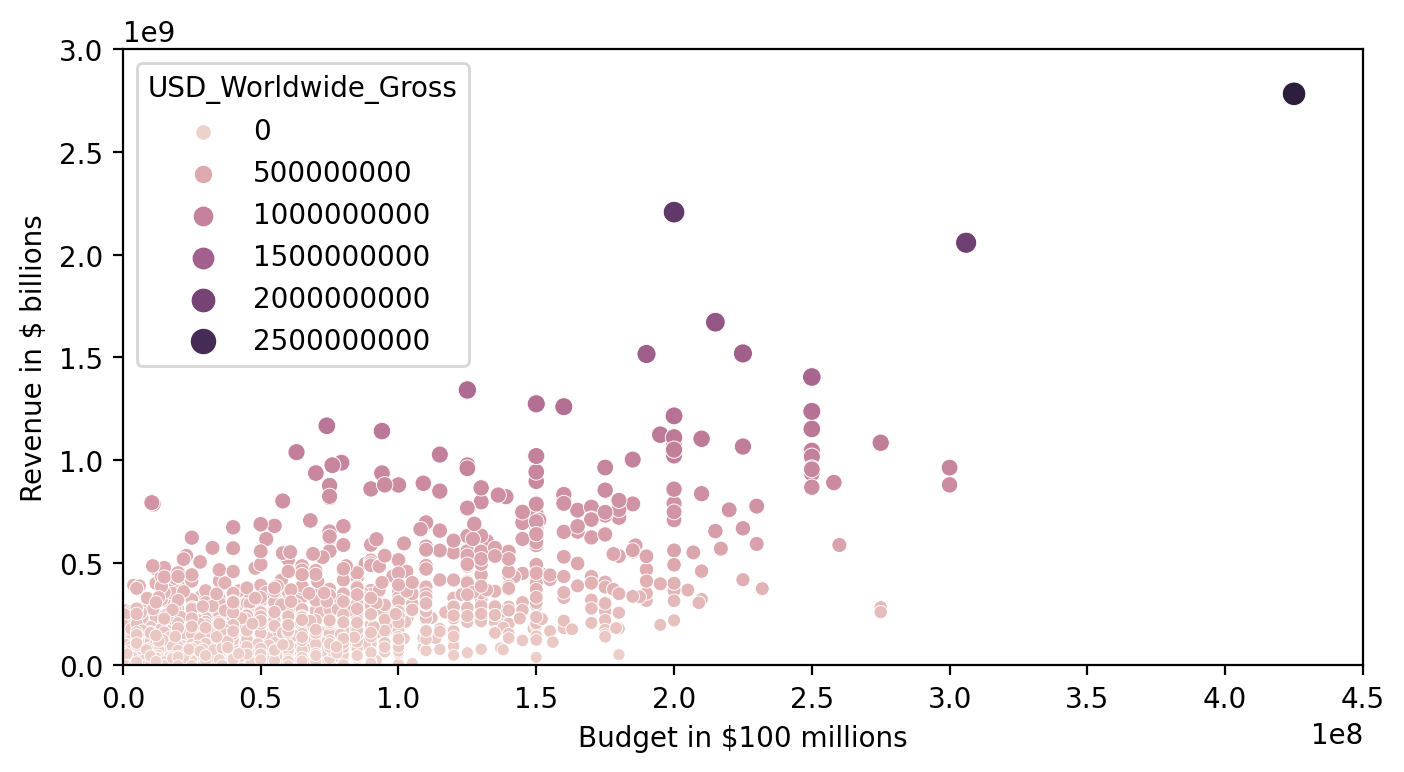

In [25]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()


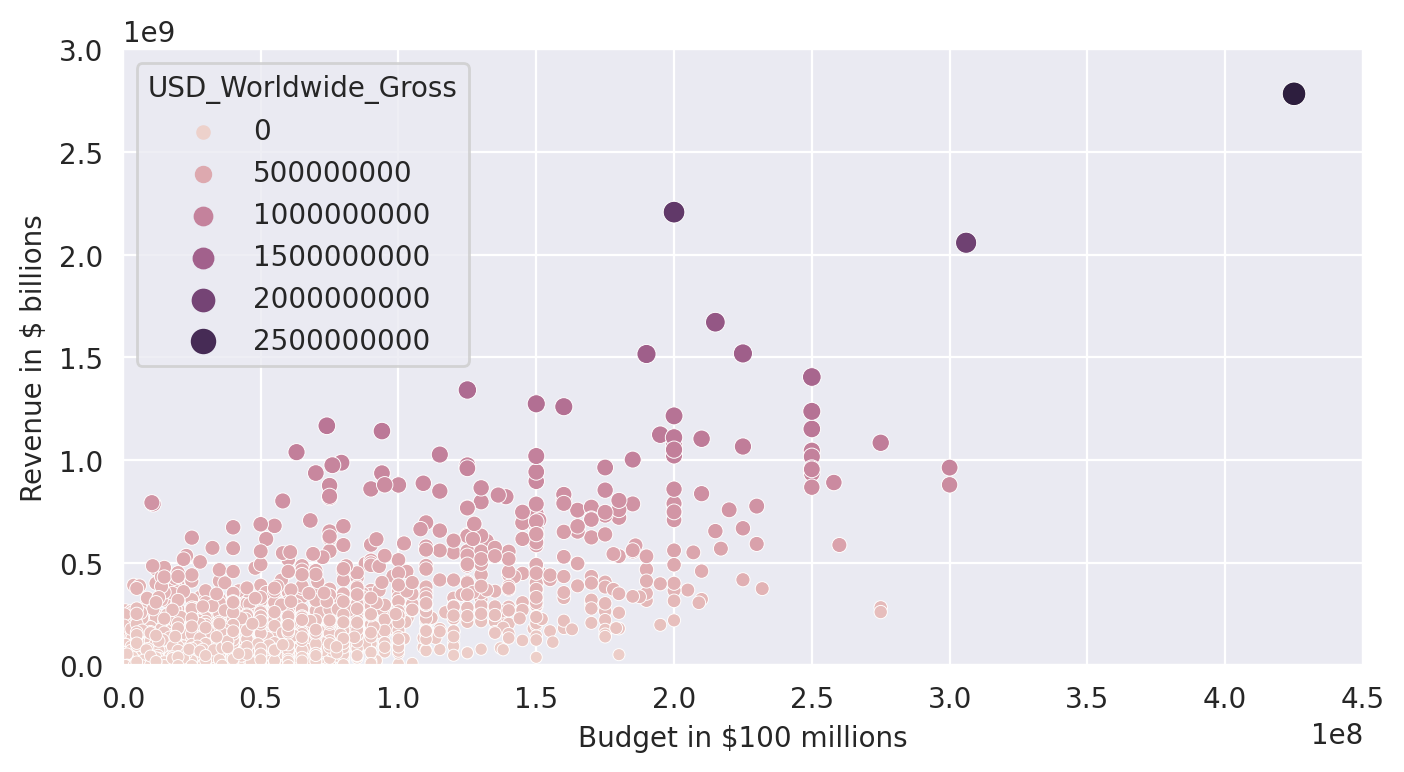

In [26]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')
 
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



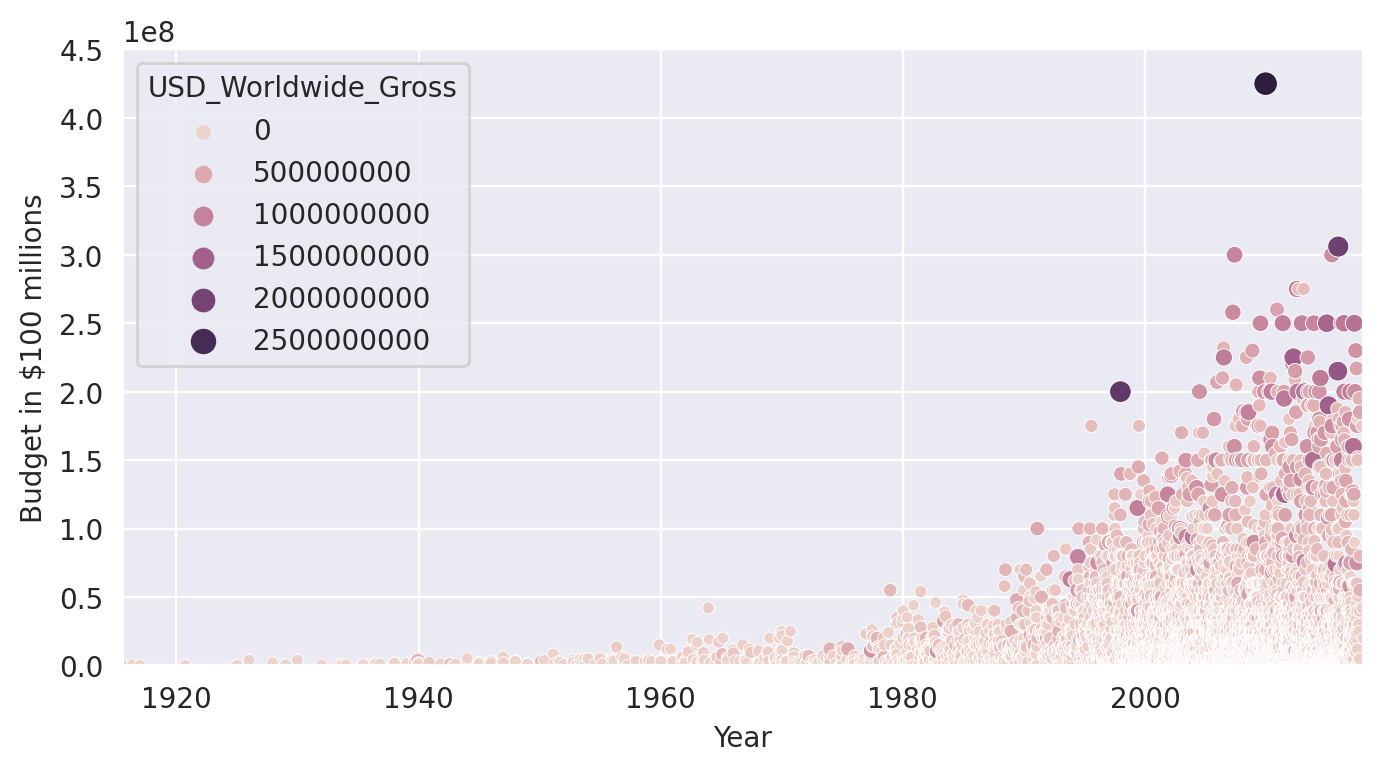

In [27]:
# release_year = pd.DatetimeIndex(data_clean['Release_Date']).yea

# plt.figure(figsize=(8,4), dpi=200)

# # set styling on a single chart
# with sns.axes_style('darkgrid'):
#   ax = sns.scatterplot(data=data_clean,
#                        x=release_year, 
#                        y='USD_Worldwide_Gross',
#                        hue='USD_Worldwide_Gross',
#                        size='USD_Worldwide_Gross')
 
#   ax.set(xlim=(1920, 2019),
#          ylim=(0, 3000000000),
#         ylabel='Revenue in $ billions',
#         xlabel='Budget in $100 millions')


plt.figure(figsize=(8,4), dpi=200)


with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')
    
    f = lambda x, _: "0.0" if x == 0 else f"{x / 1e9:.1f}"  # Divide by 1e6 to represent millions
    #f = lambda x, _: 0 if x ==0 else x / 1e9 # uncomment this line to choose the 2nd format
    
    fmt = plt.FuncFormatter(f)

    for text in ax.legend().get_texts():
        text.set_text(fmt(float(text.get_text())))

    
    ax.legend(loc='upper left', title="USD_Worldwide_Gross")

# .Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [28]:
year = pd.DatetimeIndex(data_clean["Release_Date"]).year
decade = year // 10 * 10

data_clean.insert(1, "Decade", decade, True)

data_clean.head()

,Rank,Decade,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1910,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1910,1916-05-09,Intolerance,385907,0,0
2,5230,1910,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1920,1925-01-01,The Big Parade,245000,22000000,11000000


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [49]:
old_films = data_clean[data_clean["Decade"] < 1970]
new_films = data_clean[data_clean["Decade"] >= 1970]

In [52]:
print(f"There are {old_films.shape[0]} films released prior to 1970")
biggest_budget = old_films.USD_Production_Budget.max()
#print(biggest_budget)
#old_films.sort_values(by=['USD_Production_Budget'], ascending=False).head()
most_expensive = old_films[old_films['USD_Production_Budget'] == biggest_budget]
print("The most expensive film made prior to 1970 was:")
most_expensive

There are 153 films released prior to 1970
The most expensive film made prior to 1970 was:


,Rank,Decade,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
109,1253,1960,1963-12-06,Cleopatra,42000000,71000000,57000000


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

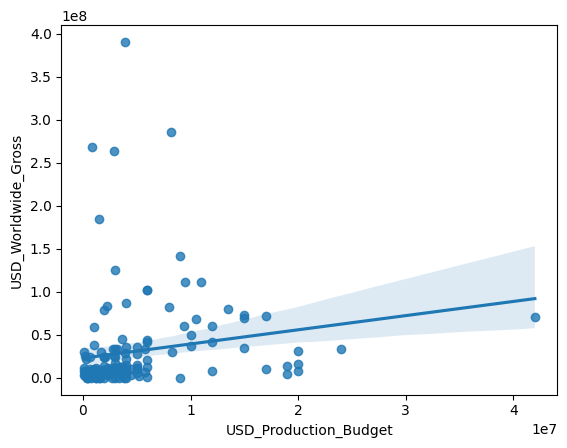

In [60]:
sns.regplot(data=old_films,
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross')
 

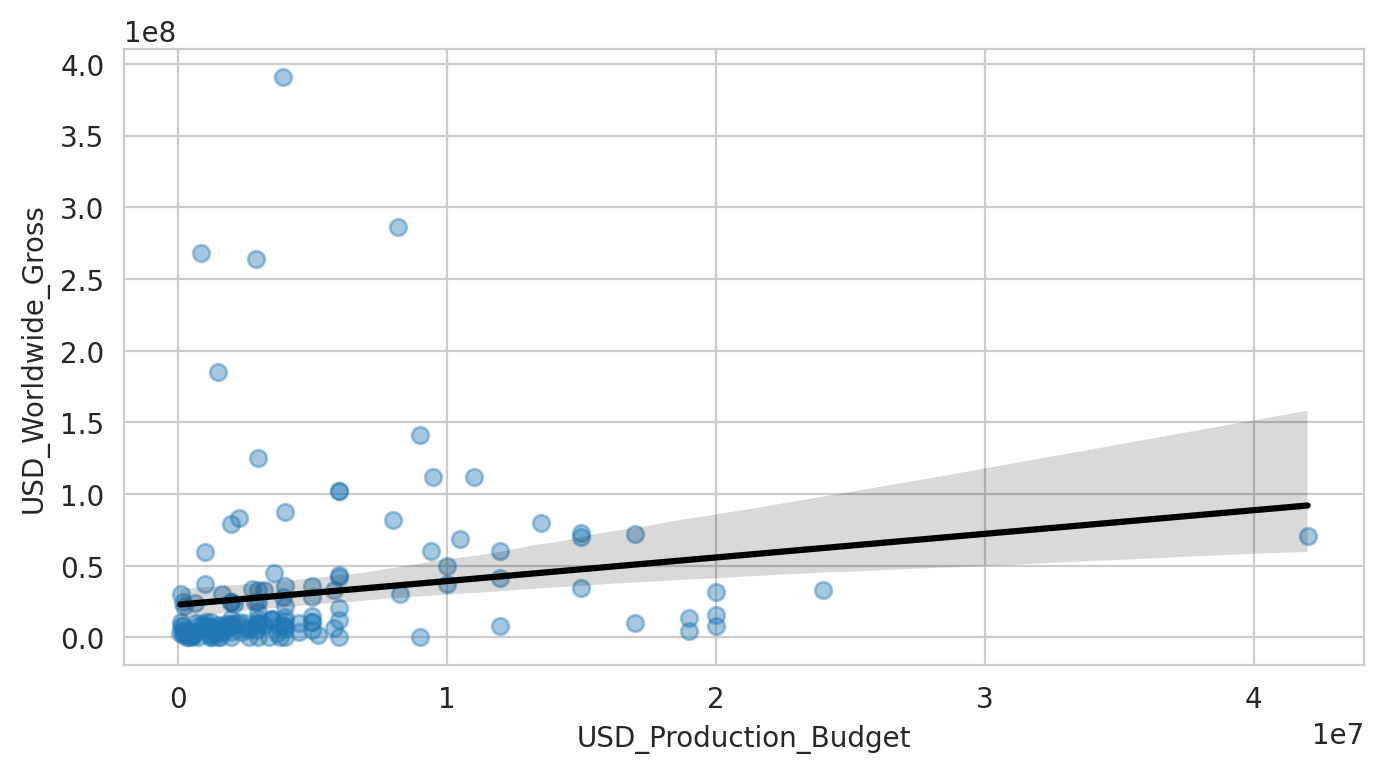

In [61]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

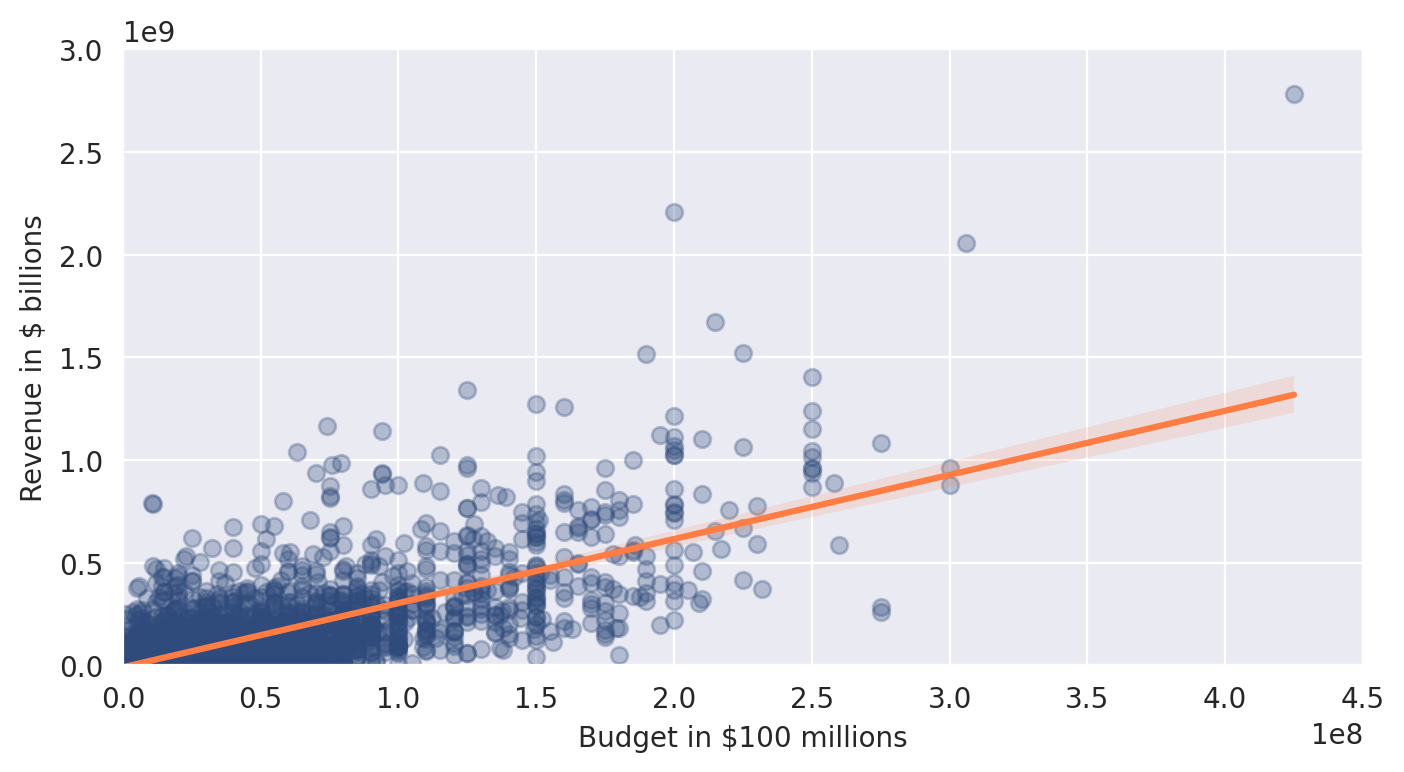

In [62]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.regplot(
        data=new_films,
        x='USD_Production_Budget',
        y='USD_Worldwide_Gross',
        color='#2f4b7c',
        scatter_kws = {'alpha': 0.3},
        line_kws = {'color': '#ff7c43'})


    ax.set(
        ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [72]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

# theta-0
print(regression.intercept_)

# theta-1
print(regression.coef_)

# R-squared
regression.score(X, y)

[-8650768.00661042]
[[3.12259592]]


0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [75]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

# Intercept
intercept = regression.intercept_

# Slope
slope = regression.coef_

# r-squared
r_squared = regression.score(X, y)

In [76]:
print("In the old films the computed values for the Linear Regression are:")
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")
print(f"r-squared: {r_squared}")

In the old films the computed values for the Linear Regression are:
Intercept: [22821538.63508039]
Slope: [[1.64771314]]
r-squared: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [77]:
22821538 + 1.64771314 * 350000000

599521137.0

In [78]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
